# Essential libraries importing

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import sklearn

# Data acquisition

Target files are the ones about weeks 1 to 9 of 2024

In [2]:
from google.colab import drive
from pathlib import Path

drive_mount_path = "/content/drive"

if not Path(drive_mount_path).exists():
  drive.mount(drive_mount_path)

Mounted at /content/drive


In [3]:
from google.colab import userdata

data_path = userdata.get('data_path')

## Load data

In [4]:
%ls "{data_path}"

trafic_capteurs_2024_W01_20240101_20240108.txt
trafic_capteurs_2024_W02_20240108_20240115.txt
trafic_capteurs_2024_W03_20240115_20240122.txt
trafic_capteurs_2024_W04_20240122_20240129.txt
trafic_capteurs_2024_W05_20240129_20240201.txt
trafic_capteurs_2024_W05_20240201_20240205.txt
trafic_capteurs_2024_W06_20240205_20240212.txt
trafic_capteurs_2024_W07_20240212_20240219.txt
trafic_capteurs_2024_W08_20240219_20240226.txt
trafic_capteurs_2024_W09_20240226_20240301.txt


Let's load week 1 data for starting

In [5]:
w1_df = pd.read_csv(f"{data_path}/trafic_capteurs_2024_W01_20240101_20240108.txt", sep=";")

print(w1_df.shape, "\n")
w1_df.head()

(555240, 12) 



,iu_ac,libelle,iu_nd_amont,libelle_nd_amont,iu_nd_aval,libelle_nd_aval,t_1h,q,k,etat_trafic,etat_barre,dessin
0,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 01:00:00,151.0,0.94556,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
1,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 02:00:00,182.0,1.20833,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
2,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 03:00:00,183.0,1.54611,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
3,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 04:00:00,158.0,0.84889,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."
4,799,Bd_Kellermann,460,Bd_Kellermann-Moulin_Pointe,459,Bd_Kellermann-Damesme,2024-01-01 05:00:00,115.0,0.71278,1,3,"""<PLINE COURBE=""""1""""><PT X=""""601352"""" Y=""""1245..."


Here is the data description

- *iu_ac* : Unique identifier for the traffic data arc
- *libelle* : Label of the track or track section modeled by the arc
- *iu_nd_amont* : Unique identifier of the upstream node of the arc
- *libelle_nd_amont* : Label of the upstream node of the arc
- *iu_nd_aval* : Identifier of the downstream node of the arc
- *libelle_nd_aval* : Label of the downstream node of the arc
- *t_1h* : Time stamp (end of processing period) in ISO format: YYYY-MM-DD HH:MM:SS
- *q* : Traffic flow (number of vehicles counted during the hour)
- *k* : Occupancy rate (as a percentage of time the measuring station is occupied by vehicles per hour). Based on this value, we can qualify traffic state at the measuring point
  + $0\% \le k \lt 15\% \rightarrow$ fluid  
  + $15\% \le k \lt 30\% \rightarrow$ presaturated  
  + $30\%  \le k \lt 50\% \rightarrow$ saturated  
  + $50\%  \le k \rightarrow$ blocked  
- *etat_trafic* : Traffic state qualification
  + 0: unknown
  + 1: fluid
  + 2: presaturated
  + 3: saturated
  + 4: blocked
- *etat_barre* : Open or closed state (crossed out, unknown, or invalid) for
arc circulation
  + 0: unknown
  + 1: open
  + 2: closed
  + 3: invalid
- *dessin* : Schematic drawing of the arc for the corresponding identifier "iu_ac" and timestamp "t_1h"

## Data overview

In [6]:
w1_df.dtypes

,0
iu_ac,int64
libelle,object
iu_nd_amont,int64
libelle_nd_amont,object
iu_nd_aval,int64
libelle_nd_aval,object
t_1h,object
q,float64
k,float64
etat_trafic,int64


In [7]:
w1_df["t_1h"] = pd.to_datetime(w1_df["t_1h"])

w1_df["t_1h"].head()

,t_1h
0,2024-01-01 01:00:00
1,2024-01-01 02:00:00
2,2024-01-01 03:00:00
3,2024-01-01 04:00:00
4,2024-01-01 05:00:00


In [8]:
w1_df.describe()

,iu_ac,iu_nd_amont,iu_nd_aval,t_1h,q,k,etat_trafic,etat_barre
count,555240.000000,555240.000000,555240.000000,555240,260251.000000,265756.000000,555240.000000,555240.000000
mean,3665.745537,1817.121331,1814.705295,2024-01-04 12:29:59.999999744,623.583641,5.926950,0.534529,2.768945
min,1.000000,0.000000,0.000000,2024-01-01 01:00:00,0.000000,0.000000,0.000000,1.000000
25%,1248.000000,578.000000,579.000000,2024-01-02 18:45:00,134.000000,1.350000,0.000000,3.000000
50%,4542.000000,2315.000000,2315.000000,2024-01-04 12:30:00,289.000000,3.302780,0.000000,3.000000
75%,5589.000000,2864.000000,2861.000000,2024-01-06 06:15:00,564.000000,7.148890,1.000000,3.000000
max,7231.000000,3740.000000,3740.000000,2024-01-08 00:00:00,7914.000000,96.118330,4.000000,3.000000
std,2332.511268,1202.643205,1199.293495,NaN,1078.200166,7.937559,0.626988,0.626147


In [9]:
# Basic statistics
print(f"Time range: <{w1_df['t_1h'].min()}> to <{w1_df['t_1h'].max()}>", "\n")
print(f"Number of unique arcs: {w1_df['iu_ac'].nunique()}", "\n")

Time range: <2024-01-01 01:00:00> to <2024-01-08 00:00:00> 

Number of unique arcs: 3305 



In [10]:
# Record distribution per arc
w1_df['iu_ac'].value_counts().describe()

,count
count,3305.0
mean,168.0
std,0.0
min,168.0
25%,168.0
50%,168.0
75%,168.0
max,168.0


All arcs appear the same number of times for this week dataset : 168.

## Arcs selection

We will load full data for our study, with a selection of 10 arcs. To choose these arcs we will aim for the ones with the least number of missig values. And for simplicity, we will assume the best candidates of week 1 are also the best for the entire dataset.

In [11]:
n_arcs = 10

In [12]:
w1_df['missing_k'] = (w1_df["k"].isna()).astype(int)
w1_df['missing_q'] = (w1_df["q"].isna()).astype(int)

In [13]:
# Arcs with the least number of `Unknown` label for traffic state
arcs_df = (
    w1_df
    .groupby('iu_ac')
    .agg(
        {
            "libelle": "first",
            "missing_k": "sum",
            "missing_q": "sum",
        }
    )
    .sort_values("missing_k")
)

arcs_df.head()


,libelle,missing_k,missing_q
iu_ac,,,
1343,Av_Republique,0,168
1345,Bd_Voltaire,0,0
1346,Bd_Voltaire,0,0
1347,Bd_Voltaire,0,0
1348,Bd_Voltaire,0,0


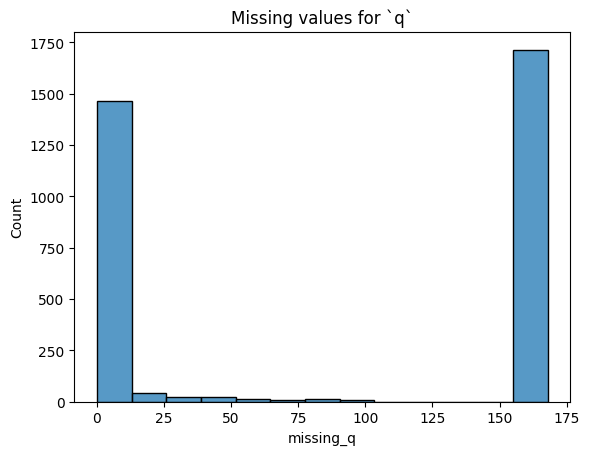

In [14]:
sns.histplot(arcs_df["missing_q"])
plt.title("Missing values for `q`")
plt.show()

Let's keep only the arcs with no missing `q` value

In [15]:
arcs_df = arcs_df[arcs_df["missing_q"] == 0]

print(arcs_df.shape)
arcs_df.head()

(927, 3)


,libelle,missing_k,missing_q
iu_ac,,,
1345,Bd_Voltaire,0,0
1346,Bd_Voltaire,0,0
1347,Bd_Voltaire,0,0
1348,Bd_Voltaire,0,0
1349,Bd_Voltaire,0,0


Since a single track (libelle) can have multiple arcs, let's choose arcs belonging to different tracks.

In [16]:
selected_arcs_df = arcs_df.drop_duplicates(("libelle")).head(n_arcs)

selected_arcs_df

,libelle,missing_k,missing_q
iu_ac,,,
1345,Bd_Voltaire,0,0
1395,Pyrenees,0,0
1397,Av_Republique,0,0
6793,Quai_d'Orsay,0,0
6811,Alain,0,0
6813,Invalides_Gallieni,0,0
6815,Av_des_Champs_Elysees,0,0
6818,Bd_Malesherbes,0,0
6996,Belleville,0,0


In [17]:
selected_arcs = list(selected_arcs_df.index)
selected_arcs

[1345, 1395, 1397, 6793, 6811, 6813, 6815, 6818, 6996, 6997]

In [18]:
w1_df.drop(columns=["missing_k", "missing_q"], inplace=True)

In [19]:
loaded_df = w1_df[w1_df["iu_ac"].isin(selected_arcs)]

for w_f in os.scandir(data_path):
    print(w_f.name, end=":")
    if w_f.name.startswith("trafic_capteurs_2024_W01"):
        print(" skipped")
        continue
    w_df = pd.read_csv(os.path.join(w_f), sep=";")
    loaded_df = pd.concat([loaded_df, w_df[w_df["iu_ac"].isin(selected_arcs)]])
    print(" loaded")

trafic_capteurs_2024_W03_20240115_20240122.txt: loaded
trafic_capteurs_2024_W02_20240108_20240115.txt: loaded
trafic_capteurs_2024_W05_20240201_20240205.txt: loaded
trafic_capteurs_2024_W05_20240129_20240201.txt: loaded
trafic_capteurs_2024_W04_20240122_20240129.txt: loaded
trafic_capteurs_2024_W06_20240205_20240212.txt: loaded
trafic_capteurs_2024_W07_20240212_20240219.txt: loaded
trafic_capteurs_2024_W09_20240226_20240301.txt: loaded
trafic_capteurs_2024_W08_20240219_20240226.txt: loaded
trafic_capteurs_2024_W01_20240101_20240108.txt: skipped


In [20]:
df = loaded_df.set_index(pd.RangeIndex(loaded_df.shape[0]))
df = df.sort_values(by=["iu_ac", "t_1h"])
df = df.drop(columns=["dessin"])

df["iu_ac"] = df["iu_ac"].astype(str) # Treat arc ID as a categorical variable
df["t_1h"] = pd.to_datetime(df["t_1h"]) # Convert to datetime

# Dataset shape
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

df.head()

Number of rows: 14400
Number of columns: 11


,iu_ac,libelle,iu_nd_amont,libelle_nd_amont,iu_nd_aval,libelle_nd_aval,t_1h,q,k,etat_trafic,etat_barre
504,1345,Bd_Voltaire,686,Republique-Voltaire,730,Voltaire-Amelot-Rampon,2024-01-01 01:00:00,288.0,8.52667,1,3
505,1345,Bd_Voltaire,686,Republique-Voltaire,730,Voltaire-Amelot-Rampon,2024-01-01 02:00:00,338.0,10.54556,1,3
506,1345,Bd_Voltaire,686,Republique-Voltaire,730,Voltaire-Amelot-Rampon,2024-01-01 03:00:00,383.0,12.11167,1,3
507,1345,Bd_Voltaire,686,Republique-Voltaire,730,Voltaire-Amelot-Rampon,2024-01-01 04:00:00,325.0,10.38222,1,3
508,1345,Bd_Voltaire,686,Republique-Voltaire,730,Voltaire-Amelot-Rampon,2024-01-01 05:00:00,276.0,7.38056,1,3


In [21]:
# Simple overview
df.describe()

,iu_nd_amont,iu_nd_aval,t_1h,q,k,etat_trafic,etat_barre
count,14400.000000,14400.000000,14400,12503.00000,12498.000000,14400.000000,14400.000000
mean,2615.600000,1581.800000,2024-01-31 00:30:00.000000256,353.03959,6.780660,1.020417,2.998472
min,686.000000,138.000000,2024-01-01 01:00:00,9.00000,0.000000,0.000000,2.000000
25%,749.000000,702.000000,2024-01-16 00:45:00,169.50000,1.727780,1.000000,3.000000
50%,3326.500000,770.000000,2024-01-31 00:30:00,307.00000,3.425560,1.000000,3.000000
75%,3532.000000,3149.000000,2024-02-15 00:15:00,477.00000,7.700143,1.000000,3.000000
max,3627.000000,3415.000000,2024-03-01 00:00:00,1323.00000,85.123340,4.000000,3.000000
std,1249.141865,1229.531595,NaN,246.42340,8.461663,0.584424,0.039058


# Data analysis

## Traffic state analysis

In [22]:
traffic_state_label = ["Unknown", "Fluid", "Presaturated", "Saturated", "Blocked"]

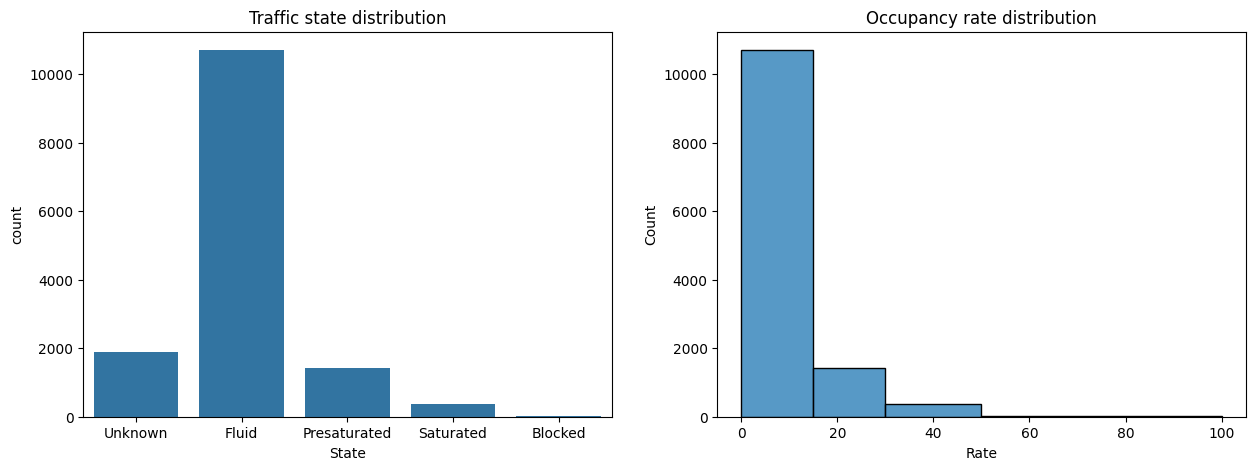

In [23]:
# Traffic state and occupancy rate distribution
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.barplot(x=traffic_state_label, y=df['etat_trafic'].value_counts().sort_index())
plt.title("Traffic state distribution")
plt.xlabel("State")

plt.subplot(122)
sns.histplot(df, x="k", bins=[0, 15, 30, 50, 100])
plt.title("Occupancy rate distribution")
plt.xlabel("Rate")

plt.show()

The known traffic state distribution presents a high frequency for fluid state. Then follows presaturated, saturated and blocked in the same order. This behavior is not surprising for the subject adressed. We can expect roads to be fluid most the time than saturated.

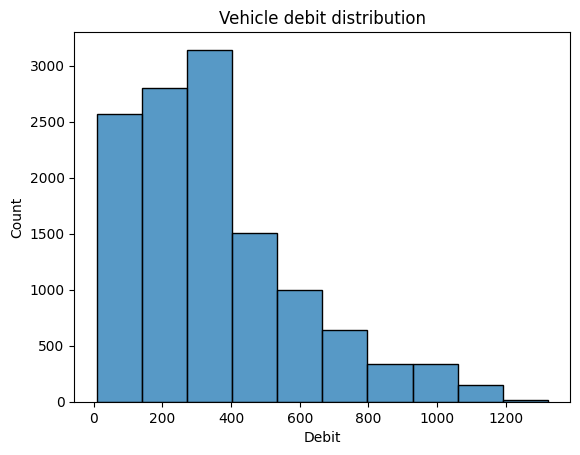

In [24]:
sns.histplot(df, x="q", bins=10)

plt.title("Vehicle debit distribution")
plt.xlabel("Debit")
plt.show()

For debit, we can observe that as the value itself augment, the frequencies increase first and then decrease after `400`. This gives a range of existence for this variable.

In [25]:
open_closed_state_labels = ["Unknown", "Open", "Closed", "Invalid"]

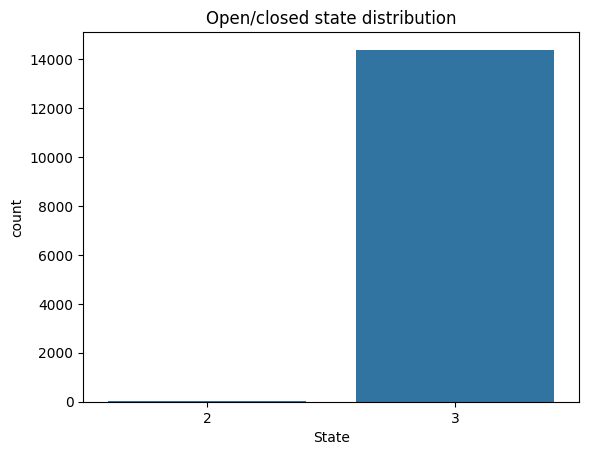

In [26]:
sns.barplot(df['etat_barre'].value_counts())
plt.title("Open/closed state distribution")
plt.xlabel("State")
plt.show()


The dataset is clearly dominated by the `Invalid` state for open/closed variable. This state implies that we cannot affirm if the track was closed or open at the time of evaluation.

## Spatial patterns

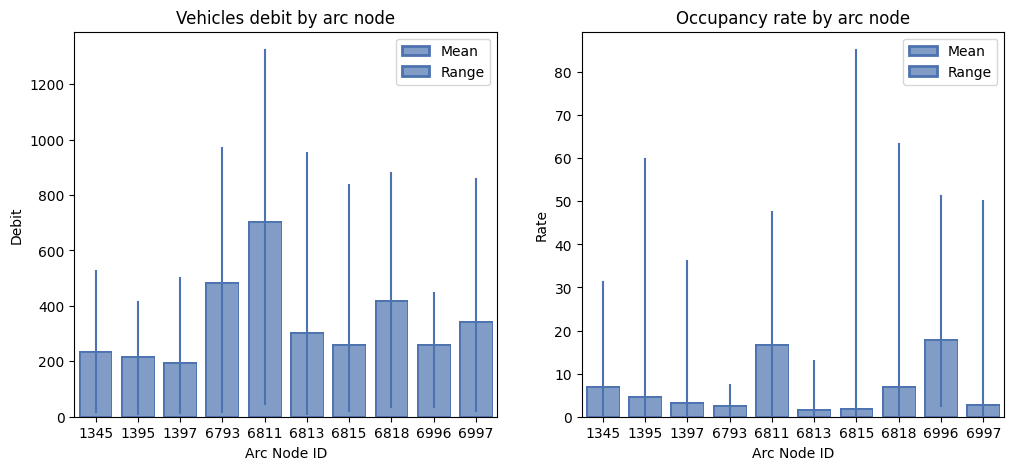

In [27]:
plt.figure(figsize=(12, 5))

# Vehicles debit `q` by arc node
ax = plt.subplot(121)
p = so.Plot(df, x=df["iu_ac"], y="q")
p = p.add(so.Bar(), so.Agg("mean"))
p = p.add(so.Range())

p = p.label(title="Vehicles debit by arc node")

p.on(ax).plot()
ax.legend(["Mean", "Range"])
ax.set_xlabel("Arc Node ID")
ax.set_ylabel("Debit")


# Occupancy rate by arc node
ax = plt.subplot(122)
p = so.Plot(df, x=df["iu_ac"], y="k")
p = p.add(so.Bar(), so.Agg("mean"))
p = p.add(so.Range())

p = p.label(title="Occupancy rate by arc node")

p.on(ax).plot()
ax.legend(["Mean", "Range"])
ax.set_xlabel("Arc Node ID")
ax.set_ylabel("Rate")

plt.show()

Both variables a high range of values for all arc nodes we have selected. Each of these nodes has presents a different behavior compared to the others in terms of traffic debit and occupancy rate.

## Temporal patterns

**Hourly**

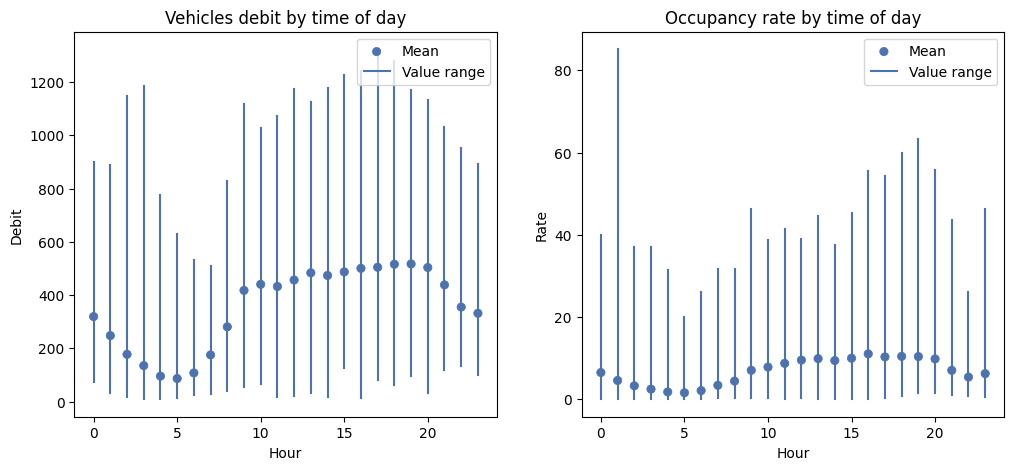

In [28]:
plt.figure(figsize=(12, 5))

# Vehicles debit `q` by time of day
ax = plt.subplot(121)
p = so.Plot(df, x=df["t_1h"].dt.hour, y="q")
p = p.add(so.Dot(), so.Agg("mean"))
p = p.add(so.Range())

p = p.label(title="Vehicles debit by time of day")

p.on(ax).plot()
ax.legend(["Mean", "Value range"])
ax.set_xlabel("Hour")
ax.set_ylabel("Debit")


# Occupancy rate by time of day
ax = plt.subplot(122)
p = so.Plot(df, x=df["t_1h"].dt.hour, y="k")
p = p.add(so.Dot(), so.Agg("mean"))
p = p.add(so.Range())

p = p.label(title="Occupancy rate by time of day")

p.on(ax).plot()
ax.legend(["Mean", "Value range"])
ax.set_xlabel("Hour")
ax.set_ylabel("Rate")

plt.show()

We can also observe that traffic debit and occupancy rate is variable by the hour of the day. Also, we can notice a quite stable progression of both variables throughout the hour evolution.

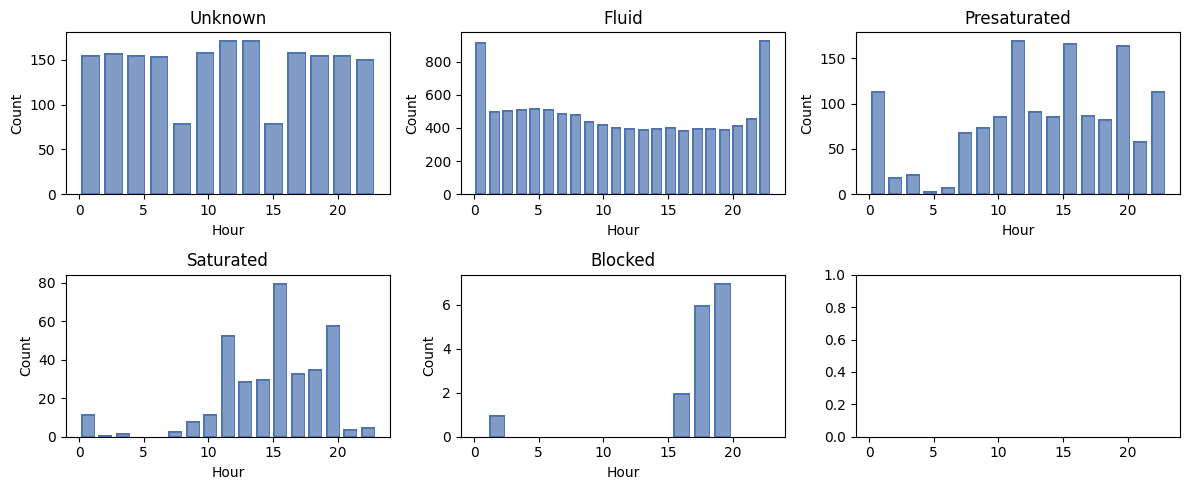

In [29]:
_, axs = plt.subplots(2, 3, figsize=(12, 5), sharex=True)

# Traffic state distribution by time of day
for i, state in enumerate(traffic_state_label):
    ax = axs[i // 3, i % 3]
    state_mask = df["etat_trafic"] == i
    p = so.Plot(x=df["t_1h"][state_mask].dt.hour)
    p = p.add(so.Bar(), so.Hist("count"))
    p = p.label(title=state, x="Hour", y="Count")
    p.on(ax).plot()

plt.tight_layout()
plt.show()

This enforces the idea that based on the hour, the traffic state hase some variability.

**Daily**

In [30]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Get day name as an ordered category
day_names = (
    df["t_1h"].dt.day_name()
    .astype(pd.CategoricalDtype(categories=days_order, ordered=True))
)

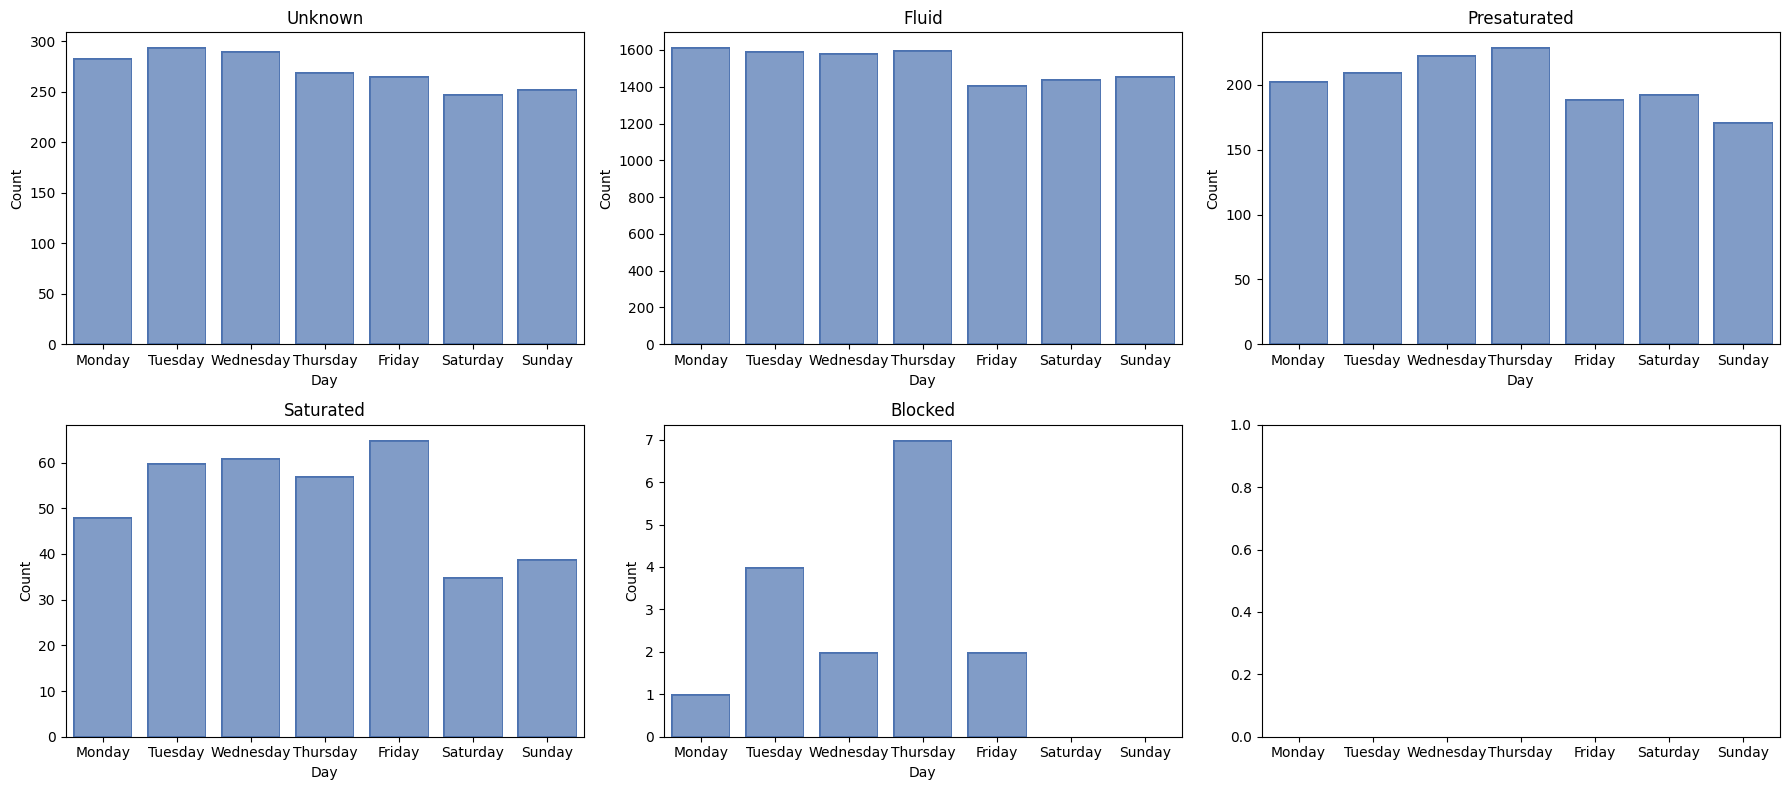

In [31]:
_, axs = plt.subplots(2, 3, figsize=(18, 8), sharex=True)

# Traffic state distribution by time of day
for i, state in enumerate(traffic_state_label):
    ax = axs[i // 3, i % 3]
    state_mask = df["etat_trafic"] == i
    p = so.Plot(df[state_mask], x=day_names[state_mask])
    p = p.add(so.Bar(), so.Hist("count"))
    p = p.label(title=state, x="Day", y="Count")
    p.on(ax).plot()

plt.tight_layout()
plt.show()

Here we can notice a global decrease of occurences for the weekend in all traffic state values.

# Data preprocessing

## Null handling

In [32]:
# Missing values
df.isna().sum()

,0
iu_ac,0
libelle,0
iu_nd_amont,0
libelle_nd_amont,0
iu_nd_aval,0
libelle_nd_aval,0
t_1h,0
q,1897
k,1902
etat_trafic,0


We will apply a **KNN imputation** to make the imputed value relying on the neighbouring space.

In [33]:
drop_columns = ["libelle", "iu_nd_amont", "libelle_nd_amont", "iu_nd_aval", "libelle_nd_aval"]

data = df.drop(columns=drop_columns)

data["k"] = data["k"] / 100 # Rescale rate between 0 and 1
data["ts"] = data["t_1h"].astype(np.int64) // (10 ** 9) # compute timestamp
data["etat_trafic"] = data.loc[:, "etat_trafic"].replace({0: np.nan}) # replace unknown value by nan for imputation

In [34]:
data.columns

Index(['iu_ac', 't_1h', 'q', 'k', 'etat_trafic', 'etat_barre', 'ts'], dtype='object')

In [35]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
knn_cols = ["iu_ac", "ts", "etat_trafic", "q", "k"]
data[knn_cols] = imputer.fit_transform(data[knn_cols])

In [36]:
data = data.drop(columns=["ts"])

In [37]:
data.isna().sum()

,0
iu_ac,0
t_1h,0
q,0
k,0
etat_trafic,0
etat_barre,0


## Temporal features

Lagged features

In [38]:
def create_trend_features_multiarc(df, target_cols=['q', 'k'], windows=[3, 6]):
    """
    Crée des features de tendance (rolling mean) par arc (iu_ac).
    """
    def _trend_features(group):
        # Re-attach `iu_ac` column to dataframe
        group = group.assign(iu_ac=group.name)
        for col in target_cols:
            for w in windows:
                group[f'{col}_rolling_mean_{w}h'] = group[col].rolling(window=w, min_periods=1).mean()
        return group

    df = df.groupby('iu_ac').apply(_trend_features, include_groups=False)
    df = df.dropna().reset_index(drop=True)
    return df


In [39]:
def create_lag_features_multiarc(df, target_cols=['q', 'k'], lags=[1, 2, 3]):
    """
    Crée des lag features pour chaque arc séparément.
    """
    def _lag_features(group):
        # Re-attach `iu_ac` column to dataframe
        group = group.assign(iu_ac=group.name)
        for col in target_cols:
            for lag in lags:
                group[f'{col}_lag_{lag}'] = group[col].shift(lag)
        return group

    df = df.groupby('iu_ac').apply(_lag_features, include_groups=False)
    df = df.dropna().reset_index(drop=True)
    return df

In [40]:
new_data = data.copy()
new_data = create_trend_features_multiarc(new_data)
new_data = create_lag_features_multiarc(
    new_data,
    target_cols=[
        'q',
        'k',
        'q_rolling_mean_3h',
        'q_rolling_mean_6h',
        'k_rolling_mean_3h',
        'k_rolling_mean_6h',
    ],
    lags=[1],
)

In [41]:
data.shape

(14400, 6)

In [42]:
new_data.shape

(14390, 16)

Time description features

In [43]:
def create_temporal_features(df):
    df['hour_of_day'] = df['t_1h'].dt.hour
    df['day_of_week'] = df['t_1h'].dt.dayofweek  # 0=Monday, 6=Sunday
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int) # 1 if weekend, 0 if not
    return df

In [44]:
new_data = create_temporal_features(new_data)

## Ranking between variables

In [45]:
target_col = ['k']

interval_features = [
    'q_lag_1',
    'k_lag_1',
    'q_rolling_mean_3h_lag_1',
    'q_rolling_mean_6h_lag_1',
    'k_rolling_mean_3h_lag_1',
    'k_rolling_mean_6h_lag_1',
]

categorical_features = [
    'iu_ac',
    'hour_of_day',
    'day_of_week',
    'is_weekend',
]

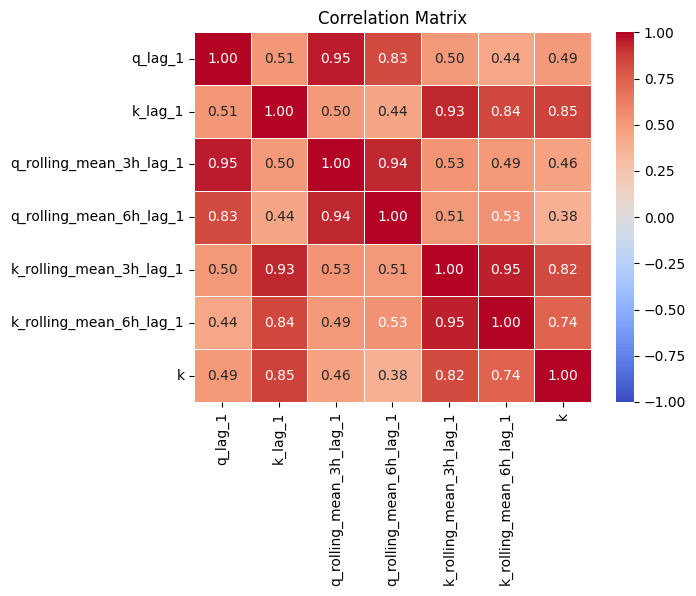

In [46]:
corr_matrix = new_data[interval_features + target_col].corr()

sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Modelisation dataset

## Data Splitting

In [47]:
test_start_idx = -(7 * 24)

train_list = []
test_list = []


for cat, group in new_data.groupby("iu_ac"):
    train_list.append(group.iloc[:test_start_idx])
    test_list.append(group.iloc[test_start_idx:])


df_train = pd.concat(train_list)
df_test = pd.concat(test_list)

In [48]:
# Train
X_train = df_train[interval_features + categorical_features]
y_train = df_train[target_col[0]]

# Test
X_test = df_test[interval_features + categorical_features]
y_test = df_test[target_col[0]]

In [49]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (12710, 10)
X_test shape:  (1680, 10)
y_train shape: (12710,)
y_test shape:  (1680,)


# One Hot Encoding on iu_ac

In [50]:
from sklearn.preprocessing import OneHotEncoder

# Apply One Hot Encoding
enc = OneHotEncoder()
train_iu_ac_cat = enc.fit_transform(X_train[['iu_ac']].astype(int))

# Convert to DataFrame
df_train_iu_ac_cat = pd.DataFrame(train_iu_ac_cat.toarray(), columns=enc.get_feature_names_out())

# Integrate data with new columns
X_train = pd.concat([X_train.reset_index(drop=True), df_train_iu_ac_cat.reset_index(drop=True)], axis=1)
X_train.head()

,q_lag_1,k_lag_1,q_rolling_mean_3h_lag_1,q_rolling_mean_6h_lag_1,k_rolling_mean_3h_lag_1,k_rolling_mean_6h_lag_1,iu_ac,hour_of_day,day_of_week,is_weekend,iu_ac_1345,iu_ac_1395,iu_ac_1397,iu_ac_6793,iu_ac_6811,iu_ac_6813,iu_ac_6815,iu_ac_6818,iu_ac_6996,iu_ac_6997
0,288.0,0.085267,288.000000,288.000000,0.085267,0.085267,1345.0,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,338.0,0.105456,313.000000,313.000000,0.095361,0.095361,1345.0,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,383.0,0.121117,336.333333,336.333333,0.103946,0.103946,1345.0,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,325.0,0.103822,348.666667,333.500000,0.110132,0.103915,1345.0,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,276.0,0.073806,328.000000,322.000000,0.099582,0.097893,1345.0,6,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
test_iu_ac_cat = enc.transform(X_test[['iu_ac']].astype(int))

# Convert to DataFrame
df_test_iu_ac_cat = pd.DataFrame(test_iu_ac_cat.toarray(), columns=enc.get_feature_names_out())

# Integrate data with new columns
X_test = pd.concat([X_test.reset_index(drop=True), df_test_iu_ac_cat.reset_index(drop=True)], axis=1)

In [52]:
X_train = X_train.drop(columns=["iu_ac"])
X_test = X_test.drop(columns=["iu_ac"])

## Standardisation

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Problem formalisation

The goal of this work is to predict the hourly occupancy rate $k$ measured by permanent traffic sensors on the Paris road network. This task is formulated as a **supervised time series regression problem**, where the model learns a function $ f_\theta $ that maps a set of explanatory variables $X_t$ to the future occupancy value $\hat{k}_{t+\Delta t}$.

In our setting, the input features include:
- **rolling averages of past hours** for both flow and occupancy
- **temporal indicators** such as hour of day, day of week, and weekend information,
- **one-hot encoded identifier of the arc**. Formally, the prediction model is defined as:

\begin{align}
\hat{k}_{t+\Delta t} = f_\theta(X_t)
\end{align}

The model will be trained to minimize a continuous loss function, typically the Mean Squared Error:

\begin{align}
\min_\theta \; \mathcal{L} = \frac{1}{N} \sum_{i=1}^N \left(k_{t+\Delta t}^{(i)} - \hat{k}_{t+\Delta t}^{(i)}\right)^2,
\end{align}


This formulation allows the model to capture temporal dependencies and structural differences across arcs, providing a foundation for short-term traffic occupation forecasting.

In the following part, we will compare 4 kinds of models:
- Linear Regression (baseline)
- Bagging SVM
- Random Forest
- LSTM (without lagged features)

# Forecasting

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import time

In [141]:
evaluation_summary = []

## Linear Regression: Baseline model

In [56]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [57]:
print("Training a Linear Regression...")

# Training start time
lr_fit_start = time.perf_counter()

# Training
lr.fit(X_train_scaled, y_train)

# Training end time
lr_fit_end = time.perf_counter()

# Training duration
lr_fit_time = lr_fit_end - lr_fit_start
print(f"Training time: {lr_fit_time:.2f} seconds")

Training a Linear Regression...
Training time: 0.03 seconds


In [142]:
# Inference start time
lr_infer_start = time.perf_counter()

# Inference
lr_y_pred = lr.predict(X_test_scaled)

# Inference end time
lr_infer_end = time.perf_counter()

# Inference duration
lr_infer_time = lr_infer_end - lr_infer_start

lr_r2 = r2_score(y_test, lr_y_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))

evaluation_summary.append({
    "Model": "Linear Regressor",
    "R2": lr_r2,
    "RMSE": lr_rmse,
    "Training time (s)": lr_fit_time,
    "Inference time (s)": lr_infer_time,
})

print(f"Inference time: {lr_infer_time:.2f} seconds")
print(f"R-squared (R²) Score: {lr_r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")

Inference time: 0.00 seconds
R-squared (R²) Score: 0.7438
Root Mean Squared Error (RMSE): 0.0379


## Grid Search & Ensemble Models

### Bagging with SVM

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [121]:
# Base SVM
svm_base = SVR()

# Bagging SVM
bag_svm = BaggingRegressor(estimator=svm_base, random_state=42, n_estimators=5)

# Bagging SVM parameters
bag_svm_params_grid = {
    'estimator__epsilon': [0.01, 0.1],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto'],
    'n_estimators': [5, 10],
}

# Grid Search for bagging SVM
bag_svm_grid = GridSearchCV(
    bag_svm,
    bag_svm_params_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
)

In [122]:
print("Grid Search for Bagging SVM...")

# Grid Search start time
bag_svm_grid_fit_start = time.perf_counter()

# Grid Search
bag_svm_grid.fit(X_train_scaled, y_train)

# Grid Search end time
bag_svm_grid_fit_end = time.perf_counter()

# Grid Search duration
bag_svm_grid_fit_time = bag_svm_grid_fit_end - bag_svm_grid_fit_start
print(f"Grid Search time: {bag_svm_grid_fit_time:.2f} seconds")

Grid Search for Bagging SVM...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Grid Search time: 2030.48 seconds


In [123]:
print("Best parameters for Bagging SVM:", bag_svm_grid.best_params_)

print("Training Bagging SVM...")
estimator_param_prefix = "estimator__"
estimator_params = {}
bagging_params = {}
for param, value in bag_svm_grid.best_params_.items():
    if param.startswith(estimator_param_prefix):
        estimator_params[param.removeprefix(estimator_param_prefix)] = value
    else:
        bagging_params[param] = value
estimator = SVR(**estimator_params)
bag_svm = BaggingRegressor(estimator=estimator, **bagging_params)

# Training start time
bag_svm_fit_start = time.perf_counter()

# Training
bag_svm.fit(X_train_scaled, y_train)

# Training end time
bag_svm_fit_end = time.perf_counter()

# Training duration
bag_svm_fit_time = bag_svm_fit_end - bag_svm_fit_start
print(f"Training time: {bag_svm_fit_time:.2f} seconds")

Best parameters for Bagging SVM: {'estimator__epsilon': 0.01, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'n_estimators': 5}
Training Bagging SVM...
Training time: 219.56 seconds


In [143]:
# Inference start time
bag_svm_infer_start = time.perf_counter()

# Inference
bag_svm_y_pred = bag_svm.predict(X_test_scaled)

# Inference end time
bag_svm_infer_end = time.perf_counter()

# Inference duration
bag_svm_infer_time = bag_svm_infer_end - bag_svm_infer_start

bag_svm_r2 = r2_score(y_test, bag_svm_y_pred)
bag_svm_rmse = np.sqrt(mean_squared_error(y_test, bag_svm_y_pred))

evaluation_summary.append({
    "Model": "Bagging SVM",
    "R2": bag_svm_r2,
    "RMSE": bag_svm_rmse,
    "Training time (s)": bag_svm_fit_time,
    "Inference time (s)": bag_svm_infer_time,
})

print(f"Inference time: {bag_svm_infer_time:.2f} seconds")
print(f"R-squared (R²) Score: {bag_svm_r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {bag_svm_rmse:.4f}")

Inference time: 0.52 seconds
R-squared (R²) Score: 0.7383
Root Mean Squared Error (RMSE): 0.0383


### Random Forest

In [125]:
# Random Forest
rf = RandomForestRegressor(random_state=42)

In [126]:
# Random forest parameters
rf_params_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search for Random Forest
rf_grid = GridSearchCV(
    rf,
    rf_params_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
)

In [149]:
print("Grid Search for Random Forest...")

# Grid Search start time
rf_grid_fit_start = time.perf_counter()

# Grid Search
rf_grid.fit(X_train_scaled, y_train)

# Grid Search end time
rf_grid_fit_end = time.perf_counter()

# Grid Search duration
rf_grid_fit_time = rf_grid_fit_end - rf_grid_fit_start
print(f"Grid Search time: {rf_grid_fit_time:.2f} seconds")

Grid Search for Random Forest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Grid Search time: 517.06 seconds


In [150]:
print("Best parameters for Random Forest:", rf_grid.best_params_)

print("Training Random Forest...")
rf = RandomForestRegressor(random_state=42, **rf_grid.best_params_)

# Training start time
rf_fit_start = time.perf_counter()

# Training
rf.fit(X_train_scaled, y_train)

# Training end time
rf_fit_end = time.perf_counter()

# Training duration
rf_fit_time = rf_fit_end - rf_fit_start
print(f"Training time: {rf_fit_time:.2f} seconds")

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
Training Random Forest...
Training time: 15.47 seconds


In [144]:
# Inference start time
rf_infer_start = time.perf_counter()

# Inference
rf_y_pred = rf.predict(X_test_scaled)

# Inference end time
rf_infer_end = time.perf_counter()

# Inference duration
rf_infer_time = rf_infer_end - rf_infer_start

rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))

evaluation_summary.append({
    "Model": "Random Forest",
    "R2": rf_r2,
    "RMSE": rf_rmse,
    "Training time (s)": rf_fit_time,
    "Inference time (s)": rf_infer_time,
})

print(f"Inference time: {rf_infer_time:.2f} seconds")
print(f"R-squared (R²) Score: {rf_r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")

Inference time: 0.07 seconds
R-squared (R²) Score: 0.7960
Root Mean Squared Error (RMSE): 0.0338


## LSTM

In [130]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense, BatchNormalization
from keras.callbacks import EarlyStopping

In [131]:
lstm_features = X_train.columns
lstm_features = [col_name for col_name in lstm_features if not "lag" in col_name]

print(lstm_features)

['hour_of_day', 'day_of_week', 'is_weekend', 'iu_ac_1345', 'iu_ac_1395', 'iu_ac_1397', 'iu_ac_6793', 'iu_ac_6811', 'iu_ac_6813', 'iu_ac_6815', 'iu_ac_6818', 'iu_ac_6996', 'iu_ac_6997']


In [132]:
# Select relevant future for lstm
lstm_features_idx = np.where(X_train.columns.isin(lstm_features))[0].tolist()
X_train_lstm = X_train_scaled[:, lstm_features_idx]
X_test_lstm = X_test_scaled[:, lstm_features_idx]

# Reshape to 3D-Array
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], 1, X_train_lstm.shape[1])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], 1, X_test_lstm.shape[1])

In [133]:
X_train_lstm.shape, X_test_lstm.shape

((12710, 1, 13), (1680, 1, 13))

In [134]:
# LSTM model
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(128, return_sequences=True, dropout=0.2))
lstm_model.add(BatchNormalization())
lstm_model.add(LSTM(256, dropout=0.2))
lstm_model.add(Dense(128))
lstm_model.add(Dense(1))

# Set loss and optimizer
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Print summary
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 128)         │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 500,481 (1.91 MB)

 Trainable params: 500,225 (1.91 MB)

 Non-trainable params: 256 (1.00 KB)

In [135]:
print("Training LSTM...")

# Training start time
lstm_fit_start = time.perf_counter()

# Training
callbacks=[EarlyStopping(patience=3)]
history = lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

# Training end time
lstm_fit_end = time.perf_counter()

# Training duration
lstm_fit_time = lstm_fit_end - lstm_fit_start
print(f"Training time: {lstm_fit_time:.2f} seconds")

Training LSTM...
Epoch 1/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 2/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0045 - val_loss: 0.0124
Epoch 3/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0039 - val_loss: 0.0071
Epoch 4/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0037 - val_loss: 0.0077
Epoch 5/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0035 - val_loss: 0.0098
Epoch 6/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0036 - val_loss: 0.0070
Epoch 7/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0035 - val_loss: 0.0087
Epoch 8/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0034 - val_loss: 0.0085
Epoch 9/10
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0033 - val_loss: 0.0105
Training time: 27.55 seconds


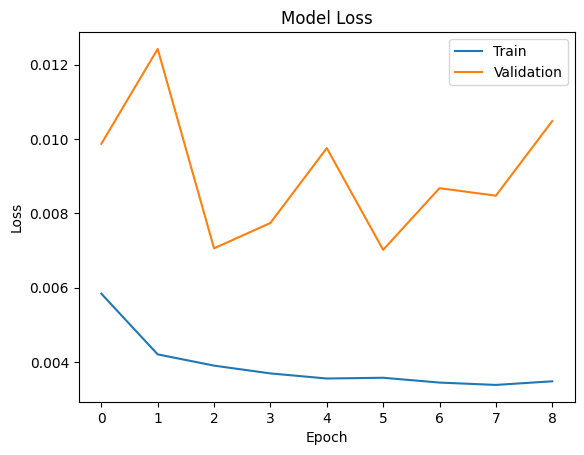

In [136]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [145]:
# Inference start time
lstm_infer_start = time.perf_counter()

# Inference
lstm_y_pred = lstm_model.predict(X_test_lstm)

# Inference end time
lstm_infer_end = time.perf_counter()

# Inference duration
lstm_infer_time = lstm_infer_end - lstm_infer_start

lstm_r2 = r2_score(y_test, lstm_y_pred)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_y_pred))

evaluation_summary.append({
    "Model": "LSTM",
    "R2": lstm_r2,
    "RMSE": lstm_rmse,
    "Training time (s)": lstm_fit_time,
    "Inference time (s)": lstm_infer_time,
})

print(f"Inference time: {lstm_infer_time:.2f} seconds")
print(f"R-squared (R²) Score: {lstm_r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse:.4f}")

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Inference time: 0.27 seconds
R-squared (R²) Score: 0.3032
Root Mean Squared Error (RMSE): 0.0625


# Model Comparison

In [146]:
evaluation_summary

[{'Model': 'Linear Regressor',
  'R2': 0.7437923704091318,
  'RMSE': np.float64(0.037874490251051295),
  'Training time (s)': 0.028998723999848153,
  'Inference time (s)': 0.0015395790014736122},
 {'Model': 'Bagging SVM',
  'R2': 0.7383186817102674,
  'RMSE': np.float64(0.03827693253672954),
  'Training time (s)': 219.55880936500034,
  'Inference time (s)': 0.5232816179996007},
 {'Model': 'Random Forest',
  'R2': 0.7960044285081744,
  'RMSE': np.float64(0.03379567592921922),
  'Training time (s)': 15.417589823999151,
  'Inference time (s)': 0.07373349999943457},
 {'Model': 'LSTM',
  'R2': 0.3032131203045634,
  'RMSE': np.float64(0.062459823034844535),
  'Training time (s)': 27.55315028000041,
  'Inference time (s)': 0.2733870369993383}]

In [147]:
df_evaluation_summary = pd.DataFrame(evaluation_summary)
df_evaluation_summary = df_evaluation_summary.set_index("Model")
df_evaluation_summary

,R2,RMSE,Training time (s),Inference time (s)
Model,,,,
Linear Regressor,0.743792,0.037874,0.028999,0.001540
Bagging SVM,0.738319,0.038277,219.558809,0.523282
Random Forest,0.796004,0.033796,15.417590,0.073733
LSTM,0.303213,0.062460,27.553150,0.273387


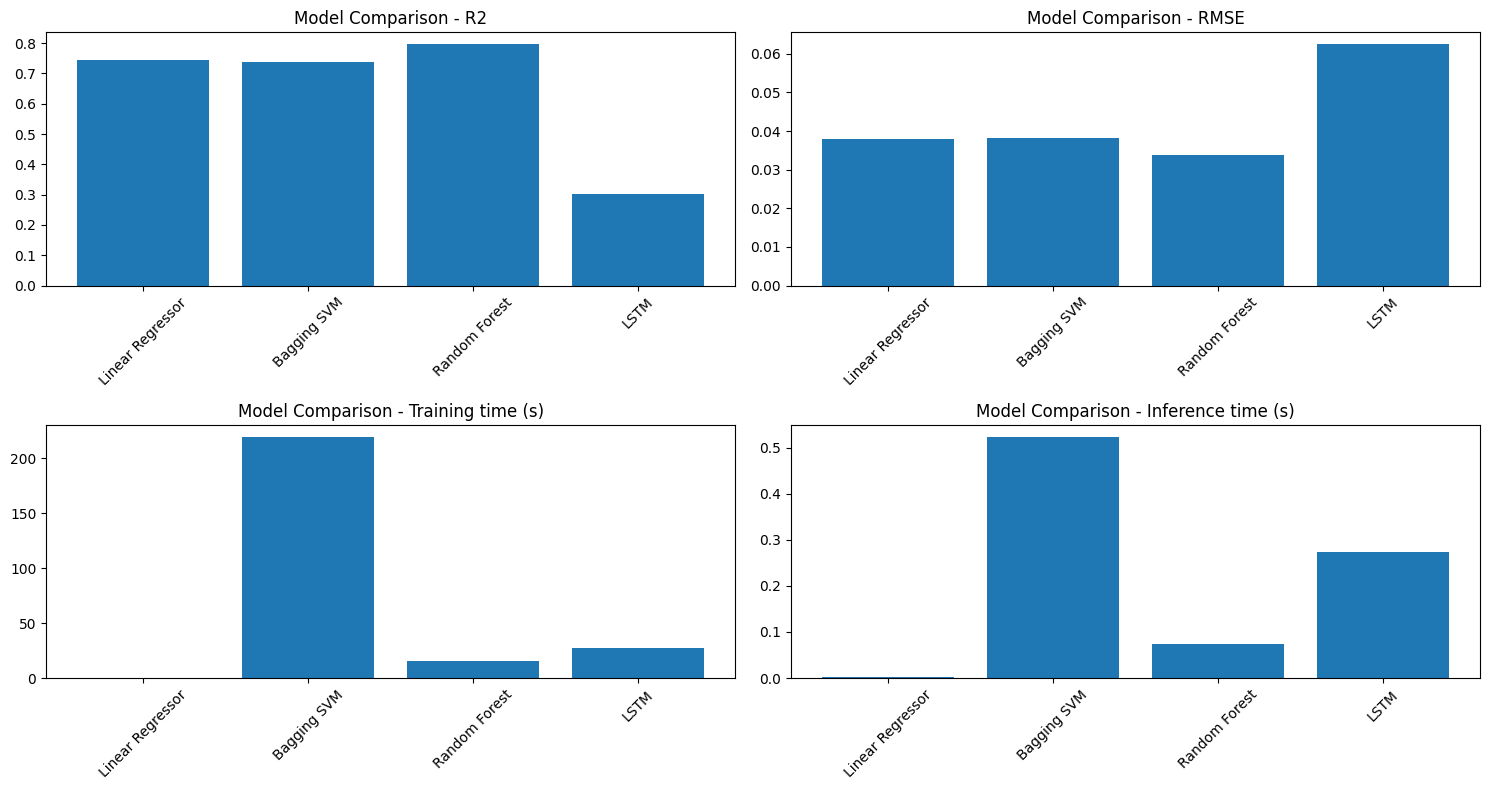

In [148]:
metrics = df_evaluation_summary.columns
_, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()

# Plot metrics bars for each model
for metric, ax in zip(metrics, axs):
    ax.bar(x=df_evaluation_summary.index, height=df_evaluation_summary[metric])
    ax.set_title(f'Model Comparison - {metric}')
    ax.tick_params("x", rotation=45)

# Show plot
plt.tight_layout()
plt.show()

**Random forest** seems to show the best performance for this occupancy rate prediction problem. On the other hand, **LSTM** presents a poor performance regarding its low R2 score and high loss. **Linear Regression** and **Bagging SVM** has approximately the same perfomance on both metrics.

# Next steps

As a next step for this study, we can pursue with the random forest algorithm, retraining it with an external dataset like Paris weather for the concerned period : January 1st 2024 - March 1st 2024.